Iteration:  0
[9 7 7 ... 7 8 7] [9 0 5 ... 2 5 2]
0.0666829268292683
Iteration:  10
[9 7 3 ... 0 4 4] [9 0 5 ... 2 5 2]
0.14870731707317073
Iteration:  20
[9 3 3 ... 8 3 1] [9 0 5 ... 2 5 2]
0.2709268292682927
Iteration:  30
[9 0 0 ... 1 3 1] [9 0 5 ... 2 5 2]
0.38878048780487806
Iteration:  40
[9 0 0 ... 1 3 1] [9 0 5 ... 2 5 2]
0.45834146341463416
Iteration:  50
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.5182439024390244
Iteration:  60
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.562560975609756
Iteration:  70
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.5982926829268292
Iteration:  80
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.6286585365853659
Iteration:  90
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.6521219512195122
Iteration:  100
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.6718536585365854
Iteration:  110
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.6872439024390244
Iteration:  120
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.7020975609756097
Iteration:  130
[9 0 0 ... 1 3 2] [9 0 5 ... 2 5 2]
0.714390243902439
Iteration:  140


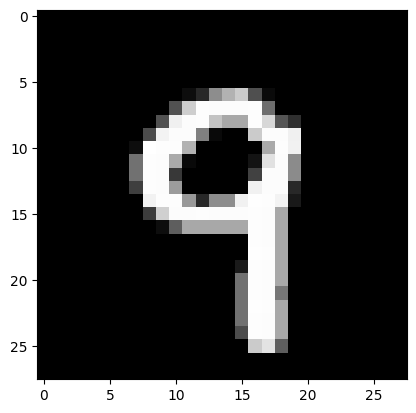

Prediction:  [0]
Label:  0


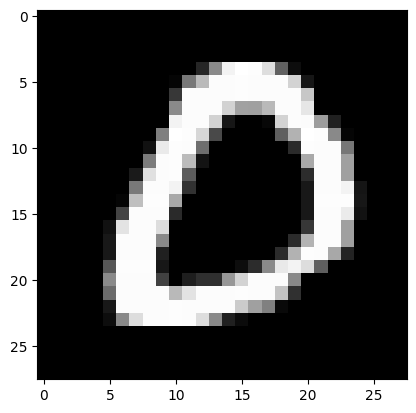

Prediction:  [5]
Label:  5


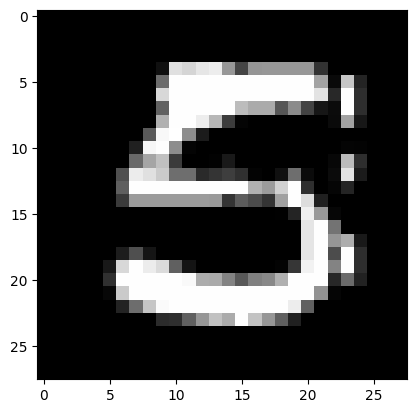

Prediction:  [4]
Label:  4


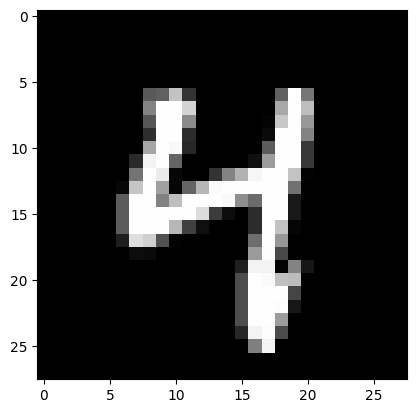

[7 9 5 2 5 9 7 6 2 6 1 6 4 0 1 5 1 9 9 5 8 9 5 5 2 9 5 8 3 3 6 0 7 7 2 1 5
 5 9 1 3 6 9 4 7 5 0 0 4 3 8 3 4 8 3 6 2 5 4 6 4 8 6 8 3 2 3 5 5 4 4 3 2 3
 0 8 0 6 4 1 2 5 3 7 2 7 0 9 6 4 7 3 6 3 3 6 8 7 4 0 9 9 1 5 1 7 9 6 9 9 2
 6 8 8 5 7 0 5 8 8 4 1 3 2 7 7 6 4 6 8 1 9 4 4 3 8 5 9 2 5 8 4 7 8 9 8 5 8
 0 7 6 5 9 8 2 9 9 0 3 5 6 2 2 3 7 6 5 1 1 3 4 7 9 2 0 8 6 4 7 4 1 8 2 2 4
 3 2 1 5 0 3 0 5 0 8 5 9 4 5 9 6 9 8 8 6 6 2 9 2 2 4 2 6 4 4 4 9 2 8 1 1 7
 3 7 3 6 4 8 4 4 2 2 3 3 9 5 5 0 3 1 6 8 7 3 0 1 6 7 3 9 7 8 7 5 5 3 7 4 3
 6 5 4 5 2 2 8 6 1 7 3 1 9 7 1 2 1 6 0 2 0 4 4 4 2 9 1 1 7 7 7 2 3 6 7 4 2
 3 9 6 1 4 6 5 7 7 2 0 3 5 1 7 7 0 3 8 9 8 3 7 6 4 0 3 9 9 9 3 4 1 5 1 8 6
 8 1 7 1 3 4 8 0 4 3 0 4 0 1 2 4 8 1 0 1 8 8 4 7 9 8 8 2 2 0 7 7 2 9 9 6 1
 6 4 3 0 4 8 8 4 1 6 1 0 4 7 2 5 7 8 4 1 1 5 6 7 0 8 4 5 0 2 3 4 1 7 6 5 6
 2 7 8 5 3 9 1 4 1 3 0 7 3 0 1 6 4 5 6 5 4 8 1 2 3 5 2 7 9 2 6 7 2 7 4 3 6
 6 6 0 7 7 4 0 4 8 5 6 9 0 7 3 5 5 3 6 7 5 4 8 9 7 7 3 3 8 3 9 6 8 3 6 0 1
 0 2 9 0 4 3 1 2 6 9 9 0 

0.845

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/automon/train.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)